In [3]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).


In [4]:
sales = pd.read_csv('sales_data_with_discounts.csv')

In [5]:
sales.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


#### 2.	Identify numerical columns in the dataset.

In [6]:
num_cols = sales.select_dtypes(include=['number'])

In [7]:
num_cols

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


#### 3.	Calculate the mean, median, mode, and standard deviation for these columns.

In [8]:
Mean:num_cols.mean()
Median:num_cols.median()
Mode:num_cols.mode()
Standard_Deviation:num_cols.std()

In [9]:
print('Mean:\n', num_cols.mean(),'\n')
print('Median:\n', num_cols.median(), '\n')
print('Mode:\n', num_cols.mode().iloc[0], '\n')
print('Standard_Deviation:\n', num_cols.std(), '\n')

Mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64 

Median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64 

Mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64 

Standard_Deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64 



#### 4.	Provide a brief interpretation of these statistics.

###### Volume:around 5 units are sold, but the median (4) shows sales are usually lower.
###### Avg Price:The mean is very high (₹10,453) compared to the median (₹1,450), meaning a few expensive products push the average up.
###### total Sales Value & Net Sales Value: Both have high standard deviations, showing sales vary widely across products and transactions.
###### Discount Rate (%): Centered around 15%, with most discounts between 11–20%.
###### Discount Amount: Highly variable, with most discounts being small, but a few large discounts raise the average.

#### ●	Histograms:
	Plot histograms for each numerical column.
	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.


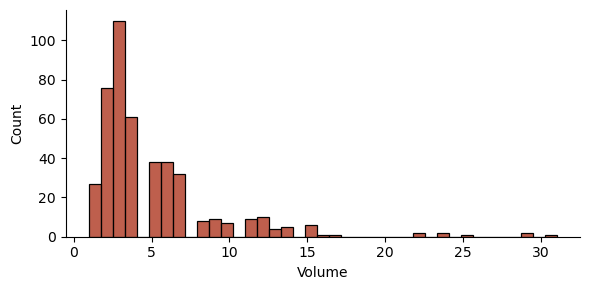

In [10]:
sns.displot(num_cols,x='Volume',
            kind='hist',
            height=3,
            aspect=2,
            color='#A82A11'
           )
plt.show()

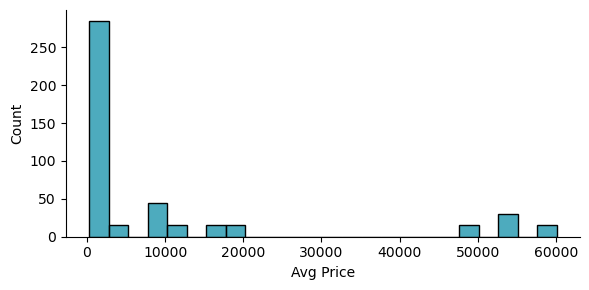

In [11]:
sns.displot(num_cols,x='Avg Price',
            kind='hist',
            height=3,
            aspect=2,
            color='#118FA8'
           )
plt.show()

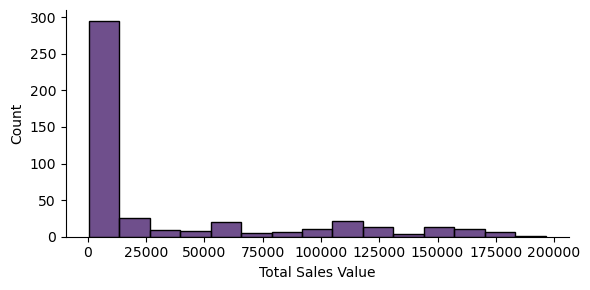

In [12]:
sns.displot(num_cols,x='Total Sales Value',
            kind='hist',
            height=3,
            aspect=2,
            color='#3F1466'
           )
plt.show()

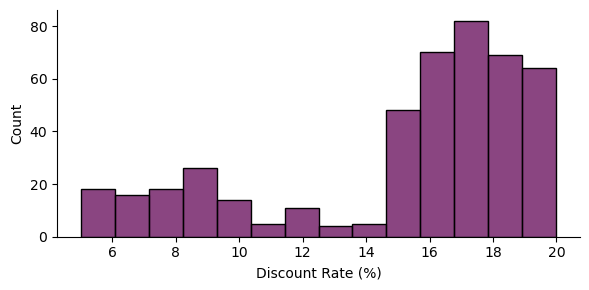

In [13]:
sns.displot(num_cols,x='Discount Rate (%)',
            kind='hist',
            height=3,
            aspect=2,
            color='#630757'
           )
plt.show()

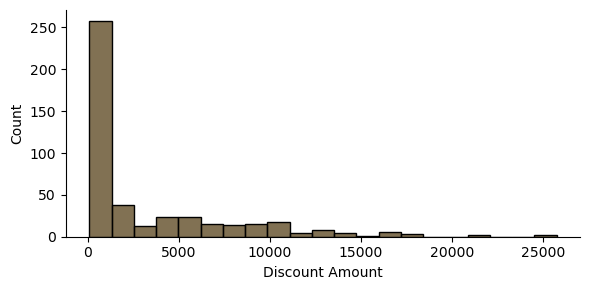

In [14]:
sns.displot(num_cols,x='Discount Amount',
            kind='hist',
            height=3,
            aspect=2,
            color='#57421A'
           )
plt.show()

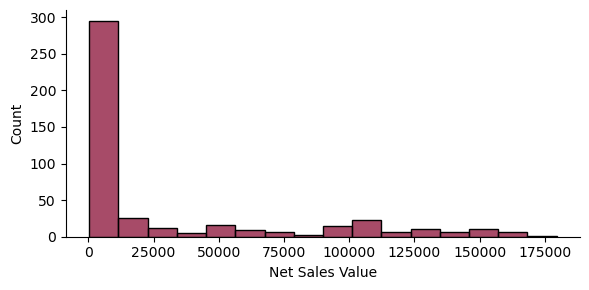

In [15]:
sns.displot(num_cols,x='Net Sales Value',
            kind='hist',
            height=3,
            aspect=2,
            color='#8A0F35'
           )
plt.show()

##### The dataset shows that most numerical variables are right-skewed, including Volume, Average Price , Total Sales Value , Discount Amount , and Net Sales Value . This indicates that while most values are relatively small, a few very high values push the distribution to the right. In contrast, Discount Rate is left-skewed  suggesting higher discounts are more common. The presence of  outliers across columns highlights variability in sales, prices, and discounts, reflecting real-world patterns of  products, bulk transactions, and large discount offers

##### ●	Box Plots:
	Create boxplots for numerical variables to identify outliers and the interquartile range.
	Discuss any findings, such as extreme values or unusual distributions.


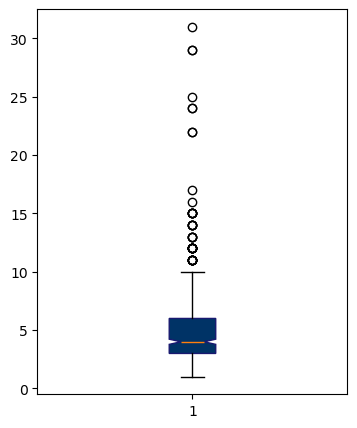

In [16]:
plt.figure(figsize = (4,5))
plt.boxplot(num_cols['Volume'],
           boxprops=dict(facecolor='#003366',edgecolor='midnightblue'),
           patch_artist=True,
           notch=True)
plt.show()

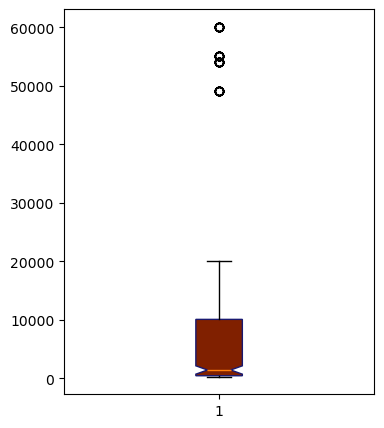

In [17]:
plt.figure(figsize = (4,5))
plt.boxplot(num_cols['Avg Price'],
           boxprops=dict(facecolor='#802000',edgecolor='midnightblue'),
           patch_artist=True,
           notch=True)
plt.show()

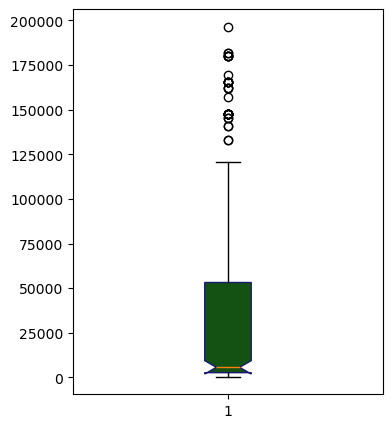

In [18]:
plt.figure(figsize = (4,5))
plt.boxplot(num_cols['Total Sales Value'],
           boxprops=dict(facecolor='#145214',edgecolor='midnightblue'),
           patch_artist=True,
           notch=True)
plt.show()

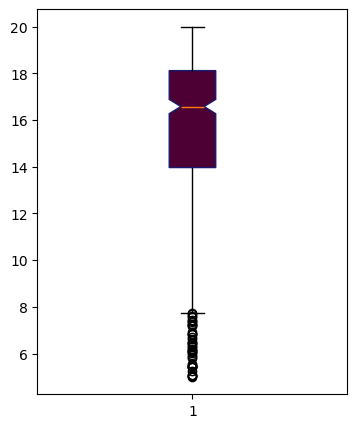

In [19]:
plt.figure(figsize = (4,5))
plt.boxplot(num_cols['Discount Rate (%)'],
           boxprops=dict(facecolor='#4d0033',edgecolor='midnightblue'),
           patch_artist=True,
           notch=True)
plt.show()

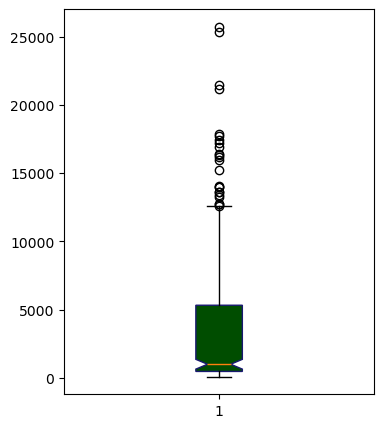

In [20]:
plt.figure(figsize = (4,5))
plt.boxplot(num_cols['Discount Amount'],
           boxprops=dict(facecolor='#004d00',edgecolor='midnightblue'),
           patch_artist=True,
           notch=True)
plt.show()

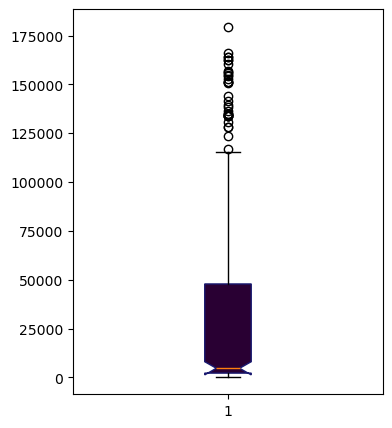

In [21]:
plt.figure(figsize = (4,5))
plt.boxplot(num_cols['Net Sales Value'],
           boxprops=dict(facecolor='#290033',edgecolor='midnightblue'),
           patch_artist=True,
           notch=True)
plt.show()

##### The boxplots reveal significant outliers across variables. Most sales volumes and discounts are small, but bulk purchases and large discounts stand out. Average Price, Total Sales Value, and Net Sales Value are skewed by a few high values, reflecting premium products and big transactions. 

In [153]:
cat_cols = sales.select_dtypes(include=['object'])
cat_cols

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


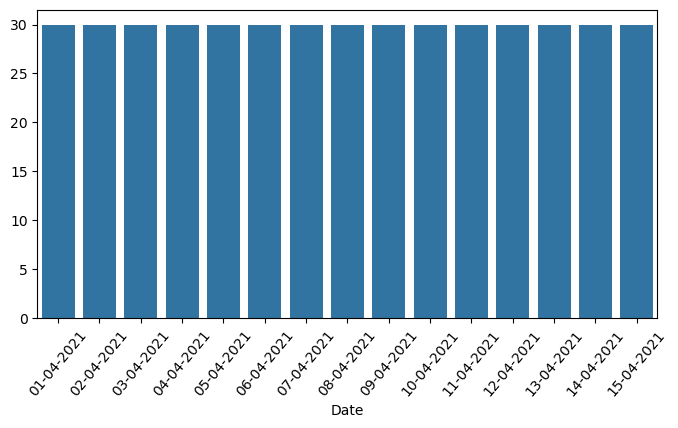

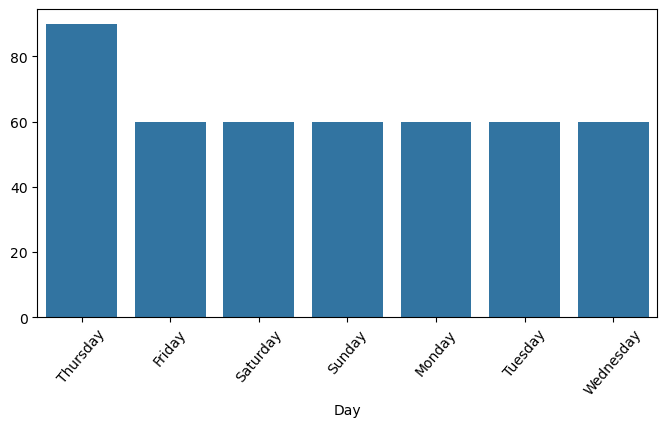

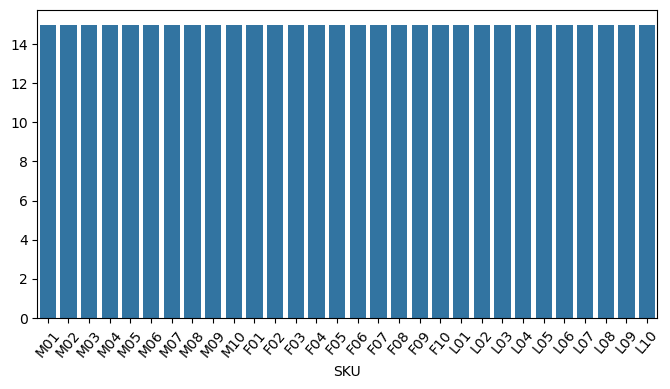

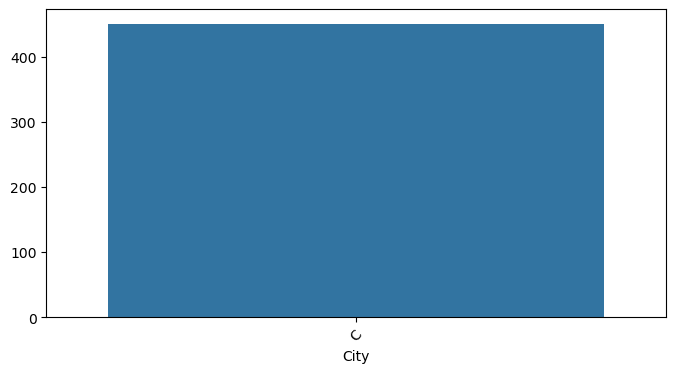

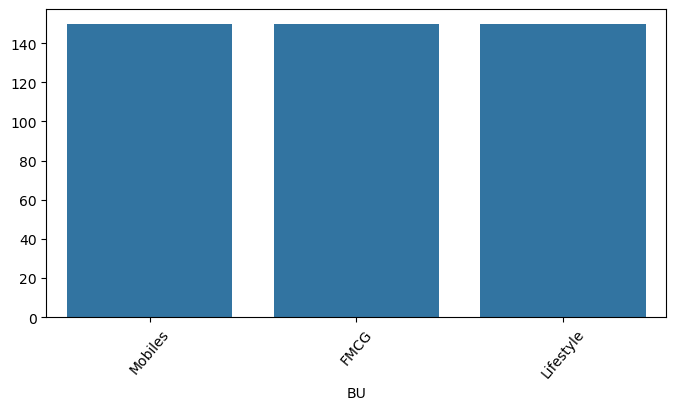

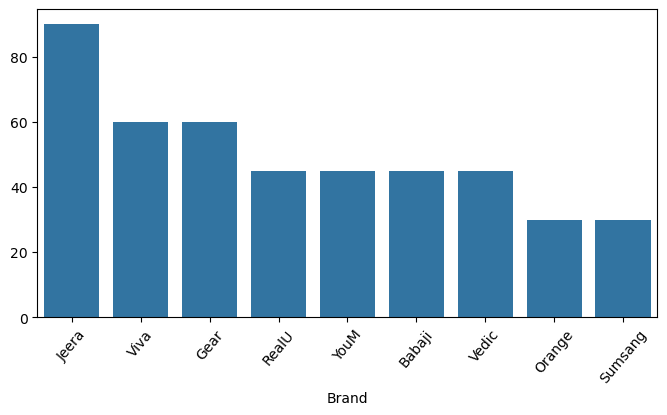

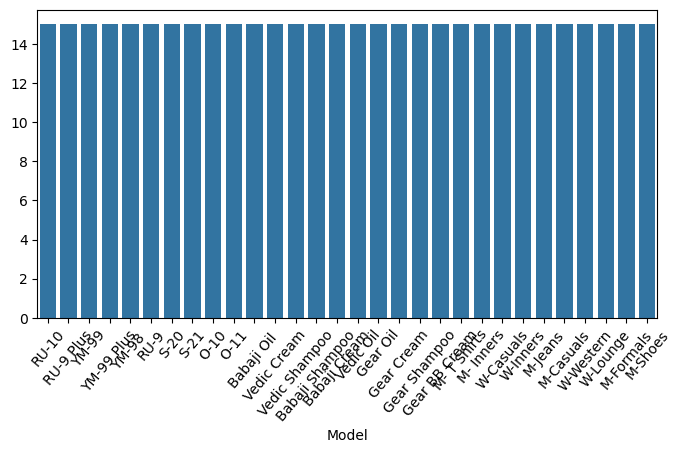

In [23]:
for j in cat_cols:
    
    plt.figure(figsize=(8,4))
    a=cat_cols[j].value_counts()
    sns.barplot(x=a.index,y=a.values,width=0.8)
    plt.xticks(rotation=50)
    plt.show()

##### Sales are not spread out evenly they are higher on certain days, in some cities, and for specific brands and models.This shows what customers like and where sales are stronger, which can help businesses plan better marketing and stock.Popular products can be promoted more, while less popular ones may need special offers to increase sales.

##### Numerical Analysis (Histograms & Boxplots):
Sales volumes, prices, discounts, and values are mostly clustered at lower ranges but show several outliers. These represent bulk purchases, premium products, and large discount offers

##### Categorical Analysis (Bar Charts):
Sales are not evenly distributed across categories. Certain days, cities, brands, and models dominate sales, showing clear customer preferences and market hotspots.

#### Standardization of Numerical Variables
●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
#### ●	Steps:
	Explain the concept of standardization (z-score normalization).
	Standardize the numerical columns using the formula: z=x-mu/sigma
	
	Show before and after comparisons of the data distributions.


1.Standardization makes numerical variables comparable by scaling them to a common range

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc = StandardScaler()

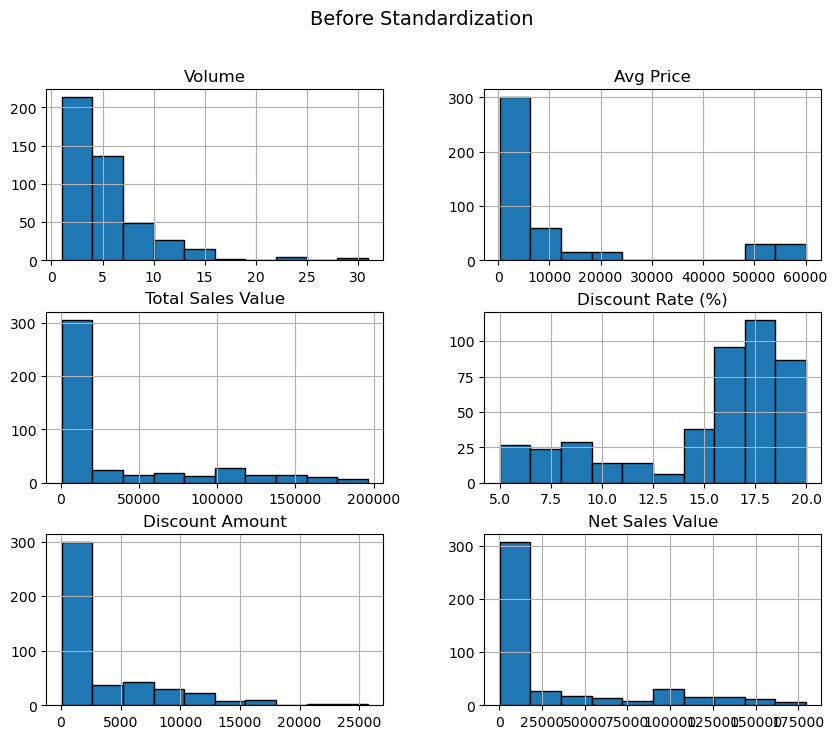

In [124]:
num_cols.hist(figsize=(10,8), edgecolor='black')
plt.suptitle("Before Standardization", fontsize=14)
plt.show()

In [125]:
standard_num_cols = sc.fit_transform(num_cols)

In [126]:
standard_num_cols

array([[ 2.35002911,  0.091173  ,  2.92572115, -0.83028851,  3.95281631,
         2.80475594],
       [ 1.16712855, -0.01957016,  1.33099521, -0.85266145,  1.84901409,
         1.2710262 ],
       [ 0.45738822,  0.31265934,  1.56277525, -1.35163138,  1.62299458,
         1.54567497],
       ...,
       [-0.72551234, -0.49022863, -0.60644824,  0.90379261, -0.60813967,
        -0.60192115],
       [-0.48893223, -0.47361715, -0.55692259,  0.38847428, -0.53037877,
        -0.55549857],
       [-0.96209245, -0.40717125, -0.60842926,  0.04223476, -0.63734468,
        -0.60123949]])

In [127]:
snc = pd.DataFrame(standard_num_cols,columns=num_cols.columns)
snc

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


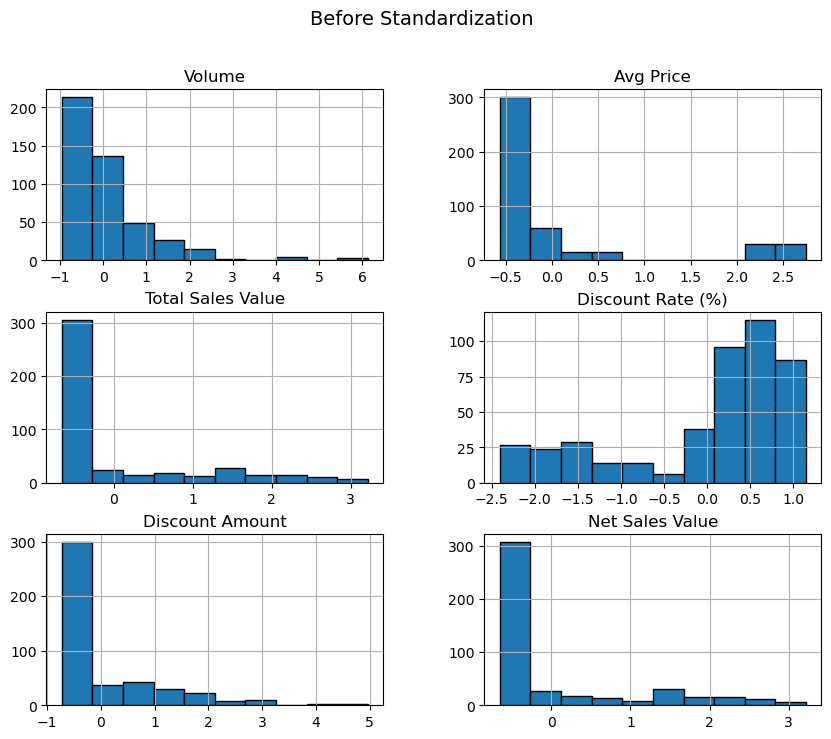

In [128]:
snc.hist(figsize=(10,8), edgecolor='black')
plt.suptitle("Before Standardization", fontsize=14)
plt.show()

#### Before Standardization:
Variables have different scales. Some are skewed with outliers.

After Standardization:
All variables are rescaled around mean 0 with standard deviation 1. Shapes of distributions remain the same, but they are now on a uniform scale — making them more suitable for analysis

#### Conversion of Categorical Data into Dummy Variables
●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.
#### ●	Steps:
	Discuss the need for converting categorical data into dummy variables (one-hot encoding).
	Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
	Display a portion of the transformed dataset.


#### Machine learning algorithms generally work with numerical data. Since categorical variables (e.g., Day, City, Brand, Model) are text-based, we need to convert them into a numeric format that algorithms can understand.

In [154]:
from sklearn.preprocessing import OneHotEncoder

In [155]:
ohe = OneHotEncoder()

In [156]:
transform_value=ohe.fit_transform(cat_cols[['BU']]).toarray()
transform_value

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [157]:
ohe.get_feature_names_out()

array(['BU_FMCG', 'BU_Lifestyle', 'BU_Mobiles'], dtype=object)

In [158]:
transform_df=pd.DataFrame(transform_value,columns=ohe.get_feature_names_out())
transform_df

,BU_FMCG,BU_Lifestyle,BU_Mobiles
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
445,0.0,1.0,0.0
446,0.0,1.0,0.0
447,0.0,1.0,0.0
448,0.0,1.0,0.0


In [159]:
cal_cols = cat_cols.join(transform_df)
cal_cols

,Date,Day,SKU,City,BU,Brand,Model,BU_FMCG,BU_Lifestyle,BU_Mobiles
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10,0.0,0.0,1.0
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus,0.0,0.0,1.0
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99,0.0,0.0,1.0
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus,0.0,0.0,1.0
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals,0.0,1.0,0.0
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western,0.0,1.0,0.0
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge,0.0,1.0,0.0
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals,0.0,1.0,0.0


In [160]:
cal_cols.drop(['BU'],axis = 1,inplace=True)

In [162]:
cal_cols

,Date,Day,SKU,City,Brand,Model,BU_FMCG,BU_Lifestyle,BU_Mobiles
0,01-04-2021,Thursday,M01,C,RealU,RU-10,0.0,0.0,1.0
1,01-04-2021,Thursday,M02,C,RealU,RU-9 Plus,0.0,0.0,1.0
2,01-04-2021,Thursday,M03,C,YouM,YM-99,0.0,0.0,1.0
3,01-04-2021,Thursday,M04,C,YouM,YM-99 Plus,0.0,0.0,1.0
4,01-04-2021,Thursday,M05,C,YouM,YM-98,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Jeera,M-Casuals,0.0,1.0,0.0
446,15-04-2021,Thursday,L07,C,Viva,W-Western,0.0,1.0,0.0
447,15-04-2021,Thursday,L08,C,Viva,W-Lounge,0.0,1.0,0.0
448,15-04-2021,Thursday,L09,C,Jeera,M-Formals,0.0,1.0,0.0
